# Linear regression in a single variable

In [1]:
import random


xs = [random.random() for k in range(100)]
ys = [0.8 * x - 1.2 + random.normalvariate(0, 0.3) for x in xs]

/tmp/ipykernel_22295/3847166974.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 0.0), loc='lower left')


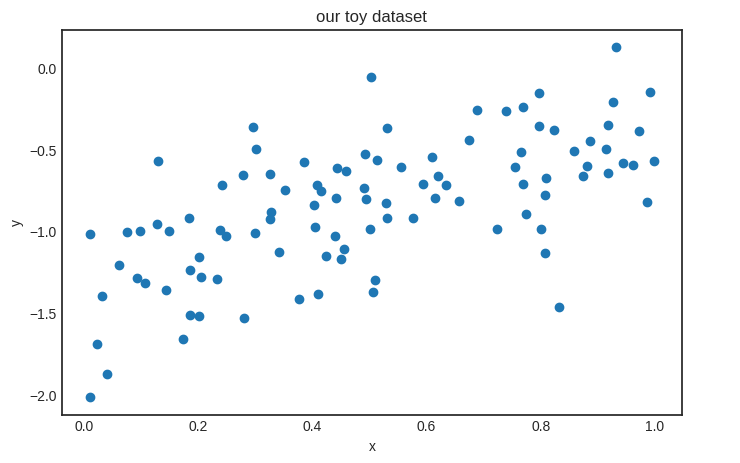

In [2]:
import matplotlib.pyplot as plt

with plt.style.context('seaborn-v0_8-white'):
    plt.figure(figsize=(8, 5))
    plt.scatter(xs, ys)
    plt.title("our toy dataset")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(bbox_to_anchor=(1.05, 0.0), loc='lower left')
    plt.show()

In [3]:
from mlfz.nn import Model
from mlfz.nn.scalar import Scalar


class LinearRegression(Model):
    def __init__(self):
        self.a = Scalar(1)
        self.b = Scalar(1)

    def forward(self, x: Scalar) -> Scalar:
        return self.a * x + self.b

    def parameters(self):
        return {"a": self.a, "b": self.b}

In [4]:
from mlfz.nn.scalar.optimizer import GradientDescent


linear_regressor = LinearRegression()

In [5]:
from mlfz.nn.scalar.loss import mean_squared_error


n_steps = 200
lr = 0.01

parameter_list = [linear_regressor.parameter_values()]

for _ in range(n_steps):
    preds = [linear_regressor.forward(x) for x in xs]
    l = mean_squared_error(preds, ys)
    l.backward()
    linear_regressor.gradient_update(lr)
    parameter_list.append(linear_regressor.parameter_values())

/tmp/ipykernel_22295/2886724898.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 0.0), loc='lower left')


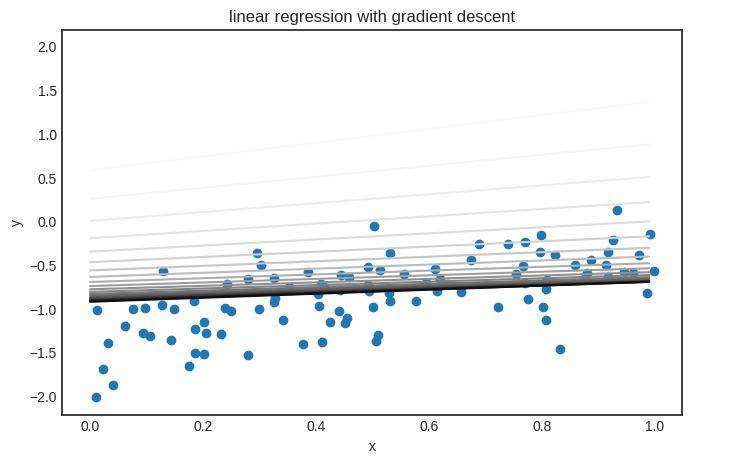

In [6]:
from matplotlib import colormaps

color_map = colormaps['Greys']

with plt.style.context('seaborn-v0_8-white'):
    plt.figure(figsize=(8, 5))
    plt.scatter(xs, ys)

    xs_plot = [k*0.01 for k in range(100)]

    trimmed_parameter_list = parameter_list[::10]
    for i, params in enumerate(trimmed_parameter_list):
        color = color_map(i / len(trimmed_parameter_list))
        linear_regressor.load_parameters(params)
        ys_plot = [linear_regressor.forward(x) for x in xs_plot]
        plt.plot(xs_plot, ys_plot, color=color)

    plt.title("linear regression with gradient descent")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(bbox_to_anchor=(1.05, 0.0), loc='lower left')
    plt.show()